# Sports Dataset

10,000 random photos from soccer matches captured at a single timestamp make up the dataset. Every snapshot has a number of elements that offer details on the current match. The objective of the dataset is to capture the evolving dynamics of a soccer game, and to make predictions for the number of goals that will be scored for the remaining playing time.

# Dataset Structure

The dataset is presented in a single file with 10,000 rows and 20 columns, each row representing a snapshot of a soccer match, and each column representing a specific attribute or feature of that snapshot.

Number of Instances (Rows): 10,000 instances 
Number of Features (Columns): 20 features/columns 

# Feature Representation

The features include identifiers such as uuid, and dynamic match-related details such as the current minute of play, home and away team scores, yellow and red cards for both teams, the number of attacks and dangerous attacks by each team, corners awarded, shots on and off target for both teams, and the ball possession percentage for both the home and away teams until the current minute.

# Libraries

- pandas
- numpy
- matplotlib
- pickle
- os
- sklearn.metrics accuracy_score, classification_report, confusion_matrix
- sklearn.model_selection cross_val_predict, cross_val_score, train_test_split
- sklearn preprocessing 
- sklearn.linear_model LogisticRegression
- sklearn.model_selection GridSearchCV,train_test_split
- 

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [91]:
df = pd.read_csv(filepath_or_buffer = 'Dataset 3 - Sports Dataset/sports.csv', header = 0)
df

,uuid,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,...,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,...,26,4,1,4,0,4,6,48,52,1
1,869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,50,50,1
2,549e25a3-4c93-459d-b115-fb303273c78a,3,0,0,0,0,0,0,3,1,...,0,0,0,0,0,0,0,62,38,4
3,287b4be5-9163-4e2e-895d-d11052a97410,17,0,0,1,0,0,0,41,46,...,25,1,0,0,2,0,0,55,45,2
4,a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,...,46,1,1,0,3,4,4,45,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,838f35c5-afa3-474b-876e-063fd49d4326,32,0,0,0,0,0,0,16,25,...,13,0,1,1,2,0,1,45,55,0
6996,4bcfd248-5f39-4af2-b465-5358c9e7088e,101,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,50,50,0
6997,deccdc2c-625e-495a-9b06-02d540d4cd24,78,1,0,0,0,0,0,71,60,...,40,7,0,5,5,7,0,61,39,2
6998,94a20308-55d8-47cb-8f8b-d2702a531c74,72,2,0,0,0,0,0,85,66,...,20,3,0,4,1,2,1,52,48,0


# Data Preprocessing
Our objective for this project is to use the data given in the dataset to predict whether 1 or more goals can be scored in the remaining playing time of the match.

Remove Missing Data

In [ ]:
df.dropna(inplace=True)

UUID is an unique identifier. no need to keep it.

In [ ]:
try:
    df = df.drop(['uuid'], axis=1)
except:
    print('no uuid')

Use only data taken within the game time. Games last 105 minutes.  
Then remove any data from halftime. Halftime should be around minute 45 to minute 60. Because of that, starting minute 60, subtract them by 15 to make data contiguous.

In [ ]:
df = df.query('0<= current_minute <= 105 ')
df = df.query('not (44 < current_minute <60)')
df['current_minute'] = df['current_minute'].apply(lambda x: x-15 if x > 45 else x)

<!-- df = df.groupby(df['current_minute'],as_index = False).aggregate('sum')
Aggregating was temptying but the samples became to small to use 
Feature Scaling
numerical_features = ['current_minute', 'home_score', 'away_score', 'home_yellow_cards', 'away_yellow_cards',
                      'home_red_cards', 'away_red_cards', 'home_attacks', 'away_attacks', 'home_dangerous_attacks',
                      'away_dangerous_attacks', 'home_corners', 'away_corners', 'home_off_target', 'away_off_target',
                      'home_on_target', 'away_on_target', 'home_possession', 'away_possession'] -->

In [93]:
# the target variable indicates whether 1 goal or more will be scored with the remaining time of the match. it shows binary values
df['target']= 0
df.loc[df['home_score'] + df['away_score']>0,'target'] = 1

X = df.drop(['target','home_score','away_score'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [94]:
# Current shape of our X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (6577, 18)
Shape of y: (6577,)


# Exploratory Data Analysis

This is the content of the dataset

In [95]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,...,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta,target
0,79,1,2,0,0,0,0,39,45,29,...,4,1,4,0,4,6,48,52,1,1
1,76,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,50,50,1,1
2,3,0,0,0,0,0,0,3,1,1,...,0,0,0,0,0,0,62,38,4,0
3,17,0,0,1,0,0,0,41,46,11,...,1,0,0,2,0,0,55,45,2,0
4,61,1,0,1,0,0,0,69,78,21,...,1,1,0,3,4,4,45,55,0,1


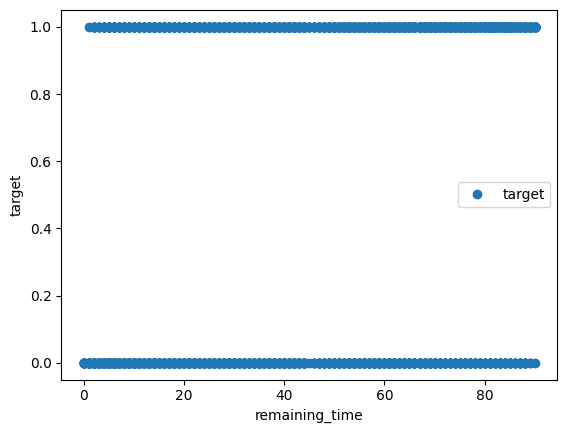

In [96]:
df.plot(x='current_minute', y='target', style='o')
plt.xlabel('remaining_time')
plt.ylabel('target')
plt.show()

Basic summary statistics for numerical values.  
Chart above shows that some snapshots had goals. Others had none. The data given does not have enough resolution to resolve when goals were made.

In [97]:
print("\nSummary statistics of numerical features:")
df.describe()


Summary statistics of numerical features:


,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,...,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta,target
count,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,...,6577.00000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000,6577.000000
mean,49.804926,0.783032,0.608332,0.510263,0.592215,0.008515,0.014900,45.755968,42.857686,27.212863,...,2.33161,1.971111,3.016573,2.551163,2.136688,1.759313,51.581572,48.415235,1.427855,0.649536
std,26.441958,1.068046,0.911459,0.907488,1.007297,0.093528,0.122412,36.029737,33.539557,22.968335,...,2.44227,2.192337,3.138122,2.719920,2.316965,2.002735,10.542929,10.544736,1.423859,0.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,13.000000,7.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,42.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,40.000000,24.000000,...,2.00000,1.000000,2.000000,2.000000,2.000000,1.000000,51.000000,49.000000,1.000000,1.000000
75%,72.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,71.000000,67.000000,42.000000,...,4.00000,3.000000,5.000000,4.000000,3.000000,3.000000,58.000000,54.000000,2.000000,1.000000
max,90.000000,8.000000,9.000000,8.000000,8.000000,2.000000,2.000000,255.000000,183.000000,132.000000,...,14.00000,18.000000,24.000000,18.000000,22.000000,19.000000,100.000000,100.000000,10.000000,1.000000


Scatterplot matrix for pairs of numerical features


Pairplot for numerical features:


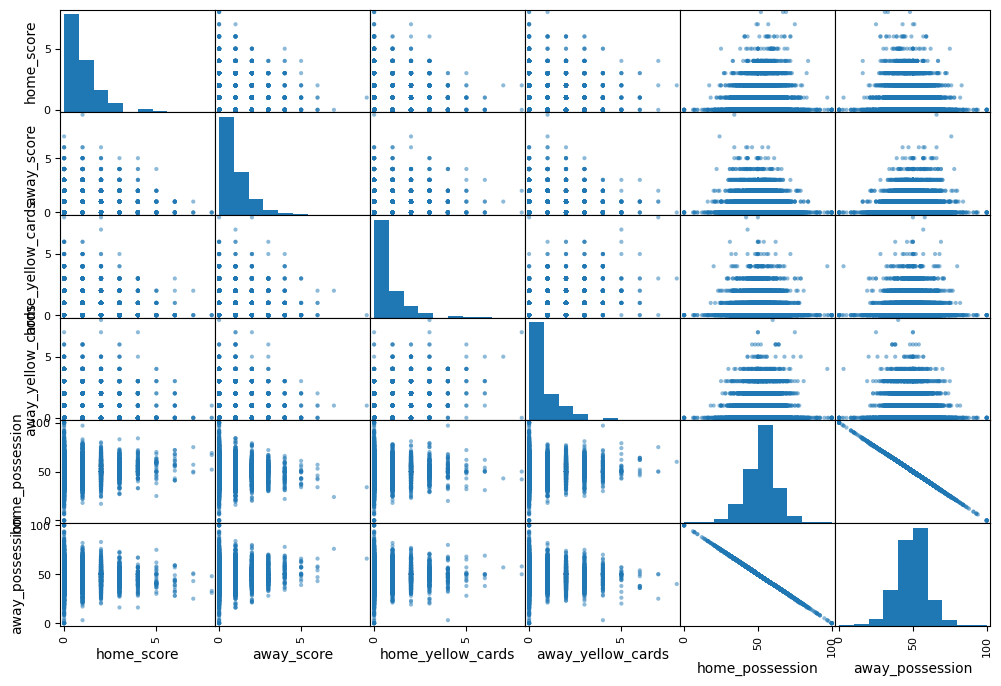

In [98]:
print("\nPairplot for numerical features:")
scatter_matrix = pd.plotting.scatter_matrix(df[['home_score', 'away_score', 'home_yellow_cards', 'away_yellow_cards', 'home_possession', 'away_possession']], figsize=(12, 8))
plt.show()

Histogram that shows the distribution of home and away scores


Distribution of home and away scores:


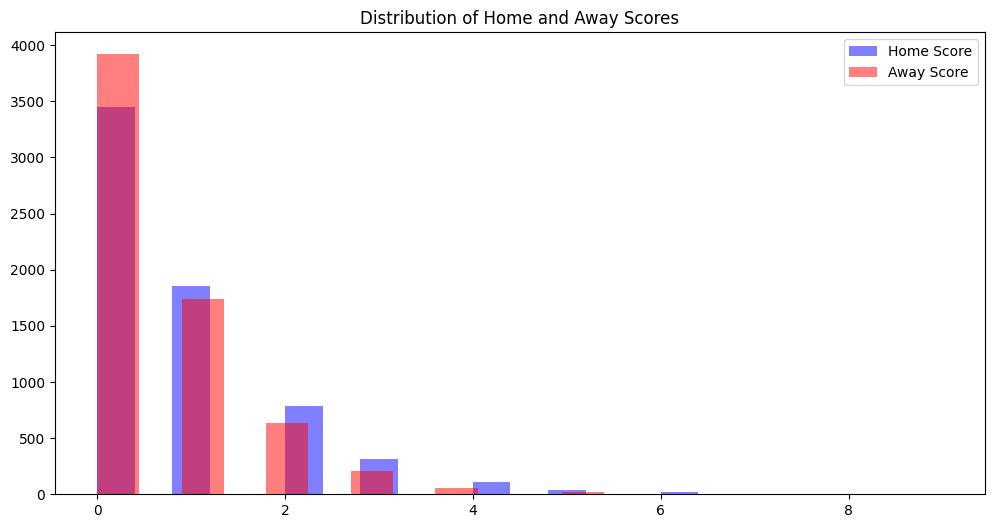

In [99]:
print("\nDistribution of home and away scores:")
plt.figure(figsize=(12, 6))
plt.hist(df['home_score'], bins=20, alpha=0.5, label='Home Score', color='blue')
plt.hist(df['away_score'], bins=20, alpha=0.5, label='Away Score', color='red')
plt.title('Distribution of Home and Away Scores')
plt.legend()
plt.show()

# Logistic Regression Model
Since this is a classification task, Logistic regression can be applied. Its implementation is rather simple here.

Step 1: Initialize the model

In [100]:
logreg = LogisticRegression(n_jobs = -1)
logreg.fit(X_train_1,y_train_1)

Step 2: Validate initial model

In [ ]:
y_pred = logreg.predict(X_val)

Step 3: Find the best hyper parameters

In [102]:
# This is the grid of possible hyperparameter values to use.
hpg = {'solver' : ['lbfgs', 'liblinear',  'sag'],
      'fit_intercept' : [True,False],
       'class_weight' : [None, 'balanced'],
       'max_iter': [i for i in range(100,1000, 100)],
       # 'C' : [1 + x* 0.1 for x in range (10)],
       # 'tol' : [1e-5,1e-4,1e-3,1e-2,1e-1],
      }
# Gridsearch the best hyperparameter values
finder = GridSearchCV(logreg,hpg,n_jobs = -1,refit = True,scoring = 'f1',error_score='raise')
finder.fit(X_val, y_val)
logreg = finder.best_estimator_

In [ ]:
train_predictions = logreg.predict(X_train)

To evaluate the model, we will get the training accuracy

In [ ]:
# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
train_conf_matrix = confusion_matrix(y_train, train_predictions)
train_classification_rep = classification_report(y_train, train_predictions)

print("Train Accuracy:", train_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Train Classification Report:\n", train_classification_rep)

Based on the results, we can see that we got an accuracy of about 93% which indicates that the model predicted the target correctly for 93% of the instances in the train set. 

Train Confusion Matrix:

True Positives: 3331
True Negatives: 1877
False Positives: 53
False Negatives: 339

In terms of accuracy, the model has a good performance on the train set in terms of precision, recall, and F1-score for both classes. Class 0 has slightly higher precision, while class 1 has slightly higher recall. The weighted average F1-score is 0.93, indicating good overall performance.

The rmse is at about 33% and the R2 score is about 50%. The R2 score indicates that the model explains about 50% of the variance in the target in the train set. The model needs improvement, especially in terms of reducing the RMSE.

Now that we have the train accuracy, rmse, and r-squared values, let's visualize our results on a graph.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix - Training Set')

# Scatter Plot for Actual vs. Predicted Values
axes[1].scatter(y_train, train_predictions, alpha=0.5)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Actual vs. Predicted Values - Training Set')
plt.tight_layout()
plt.show()

We will make a validation set using the test set

We have created the validation set. Now we will evaluate the model on it.

In [ ]:
# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, val_predictions_binary)
val_conf_matrix = confusion_matrix(y_val, val_predictions_binary)
val_classification_rep = classification_report(y_val, val_predictions_binary)

print("\nValidation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:\n", val_conf_matrix)
print("Validation Classification Report:\n", val_classification_rep)

The model achieved a high accuracy of approximately 91.6% on the validation set. The model performs well on the validation set with high precision, recall, and F1-Score for both classes.

Confusion Matrix:

True Positives: 834
True Negatives: 448
False Positives: 14
False Negatives: 104

The high accuracy, combined with balanced precision and recall, suggests that the model generalizes well to new data. The validation results indicate that the model is performing effectively on unseen data, and its predictions are reliable. 

In [ ]:
# Confusion Matrix Plot for Validation Set
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix - Validation Set')

# Scatter Plot for Actual vs. Predicted Values - Validation Set
axes[1].scatter(y_val, val_predictions, alpha=0.5)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Actual vs. Predicted Values - Validation Set')

plt.tight_layout()
plt.show()

After evaluating the model on the validation set, we will now evaluate it on the test set.

In [ ]:
# Make predictions on the test set
test_predictions = logreg.predict(X_test)

In [ ]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)
test_classification_rep = classification_report(y_test, test_predictions)

print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Classification Report:\n", test_classification_rep)

In [ ]:
# Confusion Matrix Plot for Test Set
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix - Test Set')

# Scatter Plot for Actual vs. Predicted Values - Test Set
axes[1].scatter(y_test, test_predictions, alpha=0.5)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Actual vs. Predicted Values - Test Set')

plt.tight_layout()
plt.show()

Based on the results of the test set evaluation, we can see that it is consistent with the validation set as both show the same values in terms of accuracy, classification, and confusion matrix. Given the consistency of both results, we can see that we have a robust model. 

Though the model is performing well in terms of accuracy, it still has a shortcoming in capturing the class (1). Further improvements can still be implemented through hyperparameter tuning.